In [120]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [121]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.readlines()
    return data

In [122]:
def create_labels(data, positive=True):
    labels = []
    # for i in range (len(data)):
    i = 0
    for d in data:
        data[i] = data[i].strip()
        if positive:
            labels.append(0)
        else:
            labels.append(1)
        i += 1
    return labels, data

In [123]:
def create_dataframe(positive_path, negative_path):
    positive = read_file(r'D:\codes\begali_sentiment\all_positive_8500.txt')
    negative = read_file(r'D:\codes\begali_sentiment\all_negative_3307.txt')

    positive_labels, positive = create_labels(data=positive, positive=True)
    negative_labels, negative = create_labels(data=negative, positive=False)
    print('positive: {} {} , negative: {} {}'.format(type(positive_labels), len(positive_labels), type(negative_labels), len(negative_labels)))

    all_text = positive + negative
    print(len(all_text))

    all_labels = positive_labels + negative_labels
    print(len(all_labels))
    print('first element of list: {}, label: {}'.format(all_text[0].strip(), all_labels[0]))
    print('last element of list: {}, label: {}'.format(all_text[11806].strip(), all_labels[11806]))

    data = {'text': all_text, 'label': all_labels}
    dataset = pd.DataFrame(data=data)
    return dataset


In [124]:
dataset = create_dataframe(
    positive_path = r'D:\codes\begali_sentiment\all_positive_8500.txt', 
    negative_path = r'D:\codes\begali_sentiment\all_negative_3307.txt'
)

positive: <class 'list'> 8500 , negative: <class 'list'> 3307
11807
11807
first element of list: অসাধারণ নিশো বস্ আর অমি ভাইকেও।, label: 0
last element of list: নতুন অভিনয়শিল্পী। অভারএ্যাকটিং, label: 1


In [125]:
len(dataset)

11807

In [126]:
dataset.head()

,text,label
0,অসাধারণ নিশো বস্ আর অমি ভাইকেও।,0
1,আমার দেখা বেস্ট নাটক,0
2,"নাটক টা অনেক সুন্দর হয়েছে,,,,আফরান নিশো ভাইয়...",0
3,সত্যি অসাধারণ একটি রিলেশন,0
4,মজা পাইছি ভাষা গুলো কেমন লাগলো,0


In [127]:
dataset.tail()

,text,label
11802,পালতু নাটক একটা,1
11803,"ফালতু, আলতু, টালতু",1
11804,শালা আসোলেই পেটুক,1
11805,বেহাইয়া জামাই,1
11806,নতুন অভিনয়শিল্পী। অভারএ্যাকটিং,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCBED2F880>]],
      dtype=object)

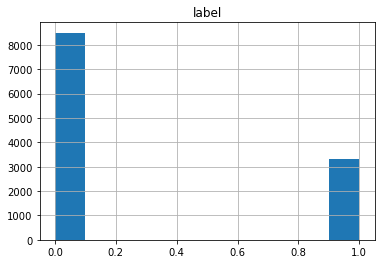

In [128]:
dataset.hist()

In [132]:
data_sample= dataset.sample(frac=1, random_state=42).reset_index(drop=True)

In [136]:
data_sample.head(15)

,text,label
0,"আমার বাংলাদেশের নাটকের ভুতে ধরেছে, ওঝা কোথায় প...",0
1,"ভাই, আপনার হার্ড ফ্যান আমি!বাট এইযে এই নাটকে য...",1
2,অনেক ভালো একটা নাটক ।।অনেক ভালোবাসি ভাই তুমাকে...,0
3,বালের নাটক বালের কনসেপ্ট,1
4,"দারুন হয়েছে, এই রকম নাটক আরো দেখতে চাই",0
5,দূর শেষমেষ মিল দেওয়ার কি আছে? এমন বাজে গালফ্রে...,1
6,এটা আমার বালের নাটক,1
7,Overall ভালই ছিল।আরিয়ান ভাই বলে কথা.........!,0
8,সত্যিই দুর্দান্ত দুর্দান্ত উভয় অংশ ... আমি এক...,0
9,এই ঈদে সব গুলো চ্যানেলের নাটুকই যদি নিশোর হতো ...,0


In [135]:
data_sample.tail(15)

,text,label
11792,২০১৯ এর বেস্ট নাটক ছিল,0
11793,অনেক ভালো লেগেছে নাটক,0
11794,এইসব আজাইররা জিনিস না বানাইলে হয় না ? আগা নাই ...,1
11795,হেডার নাটক।,1
11796,ইহা একটি শাওয়ার নাটক। এই শাওয়া বান্নাদের দ্বার...,1
11797,দারুন হইছে ভাই..... এরকম Drama আর দেখিনি....ধন...,0
11798,খুব সুন্দর নাটক টা আমার খুবই ভাল লাগছে নাটকা দ...,0
11799,বলতে গেলে বাংলা নাটক অনেক সুন্দর এক কথা বললে ...,0
11800,অনেক অনেক ভালো লাগছে,0
11801,বাহ: !!! সত্যি বেশ চমৎকার !!! শেষটা গতানুগতিক...,0


In [142]:
data_sample.to_csv(r'D:\codes\begali_sentiment\all_data.csv', index=False)